### Exercise 4

#### Question 1

\begin{equation}
     \frac{du}{dt} = Au + F(u,t) \quad \text{on} \quad [a,b]
 \end{equation}


 Multiplying the above ODE by the integrator factor $e^{-At}$,
 \begin{equation}
    \frac{d}{dt}e^{-At} - Aue^{-At} = e^{-At}F(u,t)
 \end{equation}
 
  

 Regrouping terms,
 
  \begin{equation}
     due^{-At} = e^{-At}F(u,t)dt
 \end{equation}
 

Integrating both sides on the the interval $(t_n, t_{n+1})$,

$$ \int_{t_n}^{t_{n+1}} { due^{-At}} =\int_{t_n}^{t_{n+1}} {e^{-At}F(u,t)}dt \\
$$
 
 Recall that $u$ is a function of $t$ so,
 
$$u(t_{n+1})e^{-At_{n+1}}- u(t_{n})e^{-At_{n}} = \int_{t_n}^{t_{n+1}} {e^{-At}F(u(t),t)}dt $$



Isolating $u(t_{n+1})$,
$$u(t_{n+1})e^{-At_{n+1}} = u(t_{n})e^{-At_{n}} + \int_{t_n}^{t_{n+1}} {e^{-At}F(u(t),t)}dt $$


$$u(t_{n+1}) = u(t_{n})e^{-At_{n}}e^{At_{n+1}}+ e^{At_{n+1}}\int_{t_n}^{t_{n+1}} {e^{-At}F(u(t),t)}dt $$

Simplifying and placing the constant term $e^{At_{n+1}}$ into the integral,

\begin{equation}\label{ex43}
u(t_{n+1}) = u(t_{n})e^{A(t_{n+1}-t_{n})}+ \int_{t_n}^{t_{n+1}} {e^{A(t_{n+1}-t)}F(u(t),t)}dt 
\end{equation}
  
  

Now, let $$\tau = t - t_n  \quad \Rightarrow  \quad t = \tau + t_n \quad \Rightarrow  \quad d\tau = dt $$
When $$ t= t_n  \quad \Rightarrow  \quad \tau = t_n - t_n =0  $$

And when \[t= t_{n+1} \quad \Rightarrow  \quad \tau =t_{n+1}- t_n =h \]


Making a substitution of $t$ with $\tau$, then equation becomes,
\begin{equation}
u(t_{n+1}) = u(t_{n})e^{Ah)}+ \int_{0}^{h} {e^{A(t_{n+1}-\tau -t_n)}F(u(\tau + t_n),\tau + t_n)}d\tau 
\end{equation}

\begin{equation}\label{ex44}
u(t_{n+1}) = u(t_{n})e^{Ah}+ \int_{0}^{h} {e^{-A(\tau-h )}F(u(\tau + t_n),\tau + t_n)}d\tau 
\end{equation}













#### Question 2

Assuming $F$is a constant, $F \approx F_n$. Then \it becomes,

\begin{equation}
u(t_{n+1}) = u(t_{n})e^{Ah}+ \int_{0}^{h} {e^{-A(\tau-h )}F_n} d\tau  \end{equation}

Integrating, 
$$ u(t_{n+1}) = u(t_{n})e^{Ah}+ F_n\left[-\frac{1}{A}e^{-A(\tau-h )}\right]_{0}^{h} $$

Plugging in the boundaries of the interval,

$$ u(t_{n+1}) = u(t_{n})e^{Ah}+ \frac{1}{A}F_n\left[-e^{-A(h-h ) } + e^{-A(0-h )}\right] $$

Simplifying, 
\begin{equation}
u(t_{n+1}) = u(t_{n})e^{Ah}+ \frac{1}{A}F_n\left[-e^{-A(0) } + e^{hA}\right] 
\end{equation}

The term $e^{-A(0) }=I$ the identity matrix with dimension as $A$.
Thus \the equation simplifies  to ,
\begin{equation}
u(t_{n+1}) = u(t_{n})e^{Ah}+ (e^{hA} - I ) A^{-1}F_n
\end{equation}





In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm, inv

#### Question 3

In [2]:
def ExpoMethod(a,b,A,F,h,u_0):
    N =int((b-a)/h)
    t = np.linspace(a,b,N+1)
    M= A.shape[0]
    U= np.zeros((N+1,M))
    p= expm(A*h)                             
    q = (p - np.identity(M))@inv(A)
    U[0] = u_0
    #u_n=np.zeros(3)
    for i in range(1,N+1):
        u_n = p@(u_0)+ q@F(u_0, t[i])
        U[i]= u_n
        u_0 = u_n
    return U, t    


#### Question 4

The Exact solution 

$$
\begin{cases}
    u_1(t)& = & \dfrac{1}{2}e^{t} +\dfrac{1}{4}e^{t} +\dfrac{1}{4}e^{5t}\\
u_2(t)& = & -\dfrac{1}{4}e^{t}+\dfrac{1}{4}e^{5t}\\
u_3(t)& = & -\dfrac{1}{4}e^{t}+\dfrac{1}{4}e^{5t}\
\end{cases}
$$



a).The components of the exact and approximate Solutions

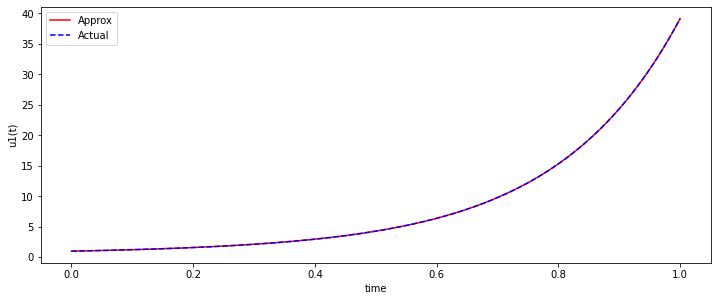

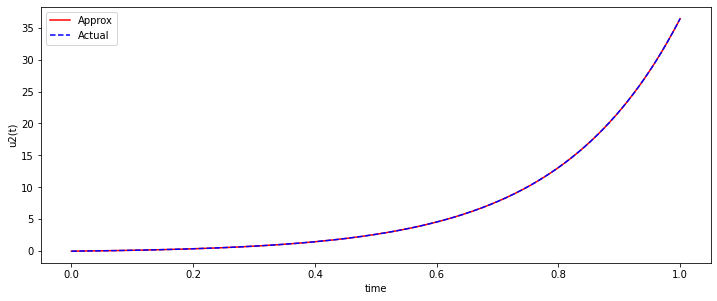

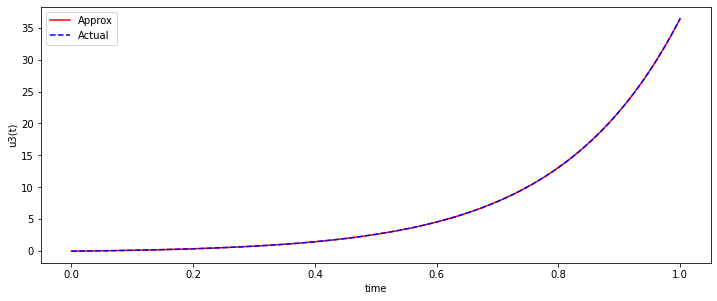

In [3]:
#Exact solution

u_1=lambda t:(1/2)*np.exp(t)+ (1/4)*np.exp(t) +(1/4)*np.exp(5*t)
u_2=lambda t:  -(1/4)*np.exp(t) + (1/4)*np.exp(5*t)
u_3= lambda t:  -(1/4)*np.exp(t) + (1/4)*np.exp(5*t)



# Components of ExpoMethod
def F1(u,t):
    return np.zeros(3)
A= np.array([[2,2,1],[1,3,1],[1,2,2]])
u0= np.array([1,0,0])
a = 0
b =1
h = 10**(-3)
U,t=ExpoMethod(a,b,A,F1,h,u0)
u_1p = U[:,0]
u_2p = U[:,1]
u_3p = U[:,2]


plt.figure(figsize=(12,16))
plt.subplot(3,1,1)
plt.plot(t,u_1p,'r' ,label = "Approx")
plt.plot(t,u_1(t),'--b', label="Actual" )
plt.xlabel('time')
plt.ylabel('u1(t)')
plt.legend()
plt.show()


plt.figure(figsize=(12,16))
plt.subplot(3,1,2)
plt.plot(t,u_2p,'r', label = "Approx")
plt.plot(t,u_2(t),'--b', label="Actual")
plt.xlabel('time')
plt.ylabel('u2(t)')
plt.legend()
plt.show()

plt.figure(figsize=(12,16))
plt.subplot(3,1,3)
plt.plot(t,u_3p,'r', label = "Approx")
plt.plot(t,u_3(t),'--b', label="Actual")
plt.xlabel('time')
plt.ylabel('u3(t)')
plt.legend()
plt.show()



b).The absolute error between the the exact and the approximate

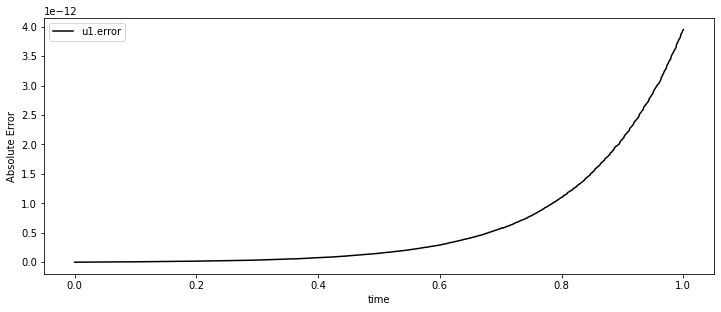

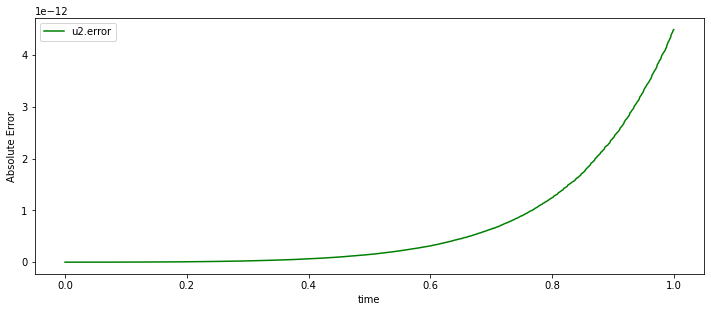

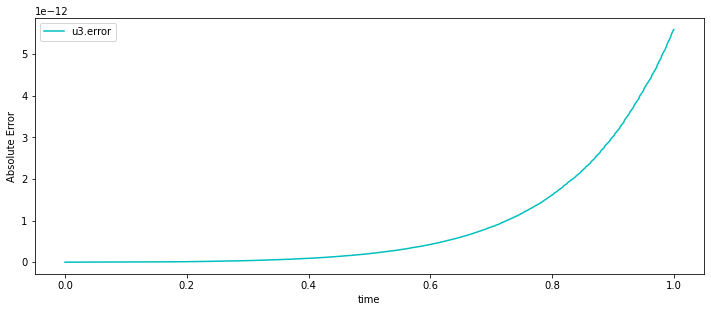

In [4]:

e1= lambda t:abs(u_1(t) -u_1p)
e2= lambda t: abs(u_2(t) -u_2p)
e3= lambda t: abs(u_3(t) -u_3p)


plt.figure(figsize=(12,16))
plt.subplot(3,1,1)
plt.plot(t,e1(t),'k', label = "u1.error")
plt.xlabel('time')
plt.ylabel('Absolute Error')
plt.legend()
plt.show()


plt.figure(figsize=(12,16))
plt.subplot(3,1,2)
plt.plot(t,e2(t),'g',label = "u2.error")
plt.xlabel('time')
plt.ylabel('Absolute Error')
plt.legend()
plt.show()


plt.figure(figsize=(12,16))
plt.subplot(3,1,3)
plt.plot(t,e3(t),'c', label = "u3.error")
plt.xlabel('time')
plt.ylabel('Absolute Error')
plt.legend()
plt.show()





Question 5

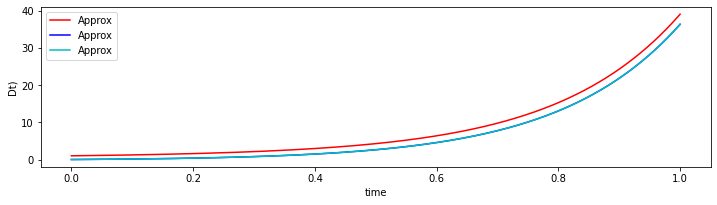

In [5]:
A= np.array([[2,2,1],[1,3,1],[1,2,2]])
u0= np.array([1,0,0])
a = 0
b =1
h = 10**(-3)
def F2(u,t):
    u_1,u_2,u_3 =u
    return np.array([t**3,0, t**2])

D,t=ExpoMethod(a,b,A,F2,h,u0)

d_1p = U[:,0]
d_2p = U[:,1]
d_3p = U[:,2]

plt.figure(figsize=(12,10))

plt.subplot(3,1,1)
plt.plot(t,d_1p,'r' ,label = "Approx")
plt.plot(t,d_2p,'b', label = "Approx")
plt.plot(t,d_3p,'c', label = "Approx")
plt.xlabel('time')
plt.ylabel('Dt)')
plt.legend()
plt.show()